In [1]:
import os

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-2])
DATA_PATH = f'{ROOT_PATH}/Dataset/SeoulMetro'

In [3]:
FONT_PATH = '/usr/share/fonts/NanumMyeongjo.ttf'

font = font_manager.FontProperties(fname = FONT_PATH).get_name()
rc('font', family = font)

In [4]:
font

'NanumMyeongjo'

In [4]:
font_list = font_manager.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list

['/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf']

In [5]:
[f.name for f in font_manager.fontManager.ttflist]

['cmex10',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmsy10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'cmtt10',
 'STIXGeneral',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmss10',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmr10',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Serif']

In [6]:
df = pd.read_csv(f'{DATA_PATH}/num_humans.csv', encoding = 'cp949')
df.sample(5).T

,7485,10149,7512,10248,1137
사용일자,20230822,20230818,20230822,20230818,20230902
호선명,2호선,장항선,5호선,7호선,7호선
역명,동대문역사문화공원(DDP),쌍용(나사렛대),마천,이수,중화
승차총승객수,13884,2241,7940,17557,8529
하차총승객수,15936,2102,7406,17161,7991
등록일자,20230825,20230821,20230825,20230821,20230905


In [7]:
matplotlib.matplotlib_fname()

'/home/utils/anaconda3/envs/ml/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'

In [8]:
df         = df[['사용일자', '호선명', '승차총승객수', '하차총승객수']]
lines      = set(sorted(df['호선명']))
dates      = set(sorted([str(date) for date in df['사용일자']]))

sum_pivots = lambda line, value: pd.pivot_table(df[df['호선명'] == line], index = '사용일자',
                                         columns = '호선명', values = value, aggfunc = 'sum')
riding_df  = [sum_pivots(line, '승차총승객수') for line in lines]
quit_df    = [sum_pivots(line, '하차총승객수') for line in lines]

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

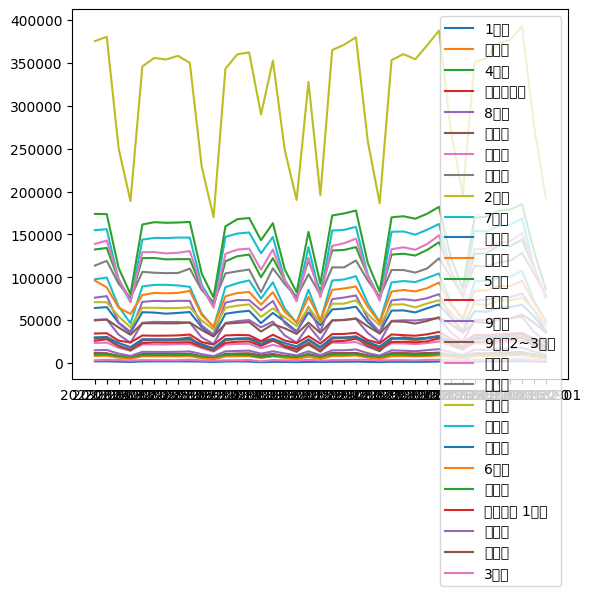

In [9]:
for riding in riding_df:
    label = riding.columns.to_list()[0]
    plt.plot(list(dates), riding.values/4, label = label)
    
plt.legend()